<a href="https://colab.research.google.com/github/Beloveddream/RS/blob/main/MF.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# 普通矩阵的矩阵分解
import numpy as np
A = np.array([[5,3],
	        [1,1]])

B = np.array([[5,1],
	        [1,1]])

C = np.array([[4,2,-5],
	        [6,4,-9],
	        [5,3,-7]])

def work(A):
	lamda, U = np.linalg.eig(A)
	print('矩阵A: ')
	print(A)
	print('特征值: ',lamda)
	print('特征向量')
	print(U)

work(A)

矩阵A: 
[[5 3]
 [1 1]]
特征值:  [5.64575131 0.35424869]
特征向量
[[ 0.97760877 -0.54247681]
 [ 0.21043072  0.84007078]]


In [2]:
# 矩阵的奇异值分解
import numpy as np
A = np.array([[1,2],
	        [1,1],
	        [0,0]])

temp1 = np.dot(A, A.T)
temp2 = np.dot(A.T, A)
print(temp1)
print(temp2)

#A = np.array([[5,1],
#	        [1,1]])

lamda1, U1 = np.linalg.eig(temp1)
print(lamda1)
print(U1)
lamda2, U2 = np.linalg.eig(temp2)
print(lamda2)
print(U2)

[[5 3 0]
 [3 2 0]
 [0 0 0]]
[[2 3]
 [3 5]]
[6.85410197 0.14589803 0.        ]
[[ 0.85065081 -0.52573111  0.        ]
 [ 0.52573111  0.85065081  0.        ]
 [ 0.          0.          1.        ]]
[0.14589803 6.85410197]
[[-0.85065081 -0.52573111]
 [ 0.52573111 -0.85065081]]


In [3]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


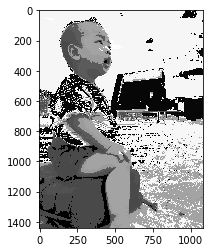

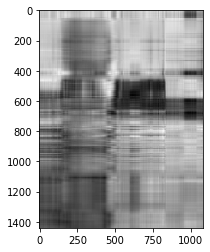

[[-16.91198295 -17.92236435 -16.19832548 ...  59.9328049   61.0910364
   71.52608896]
 [-16.54661958 -17.56758755 -15.86231581 ...  59.74320676  60.89628371
   71.37523563]
 [-16.54826611 -17.5692358  -15.86401925 ...  59.74458372  60.89766969
   71.37665253]
 ...
 [-12.35682851 -12.7496871   -9.23404627 ... -30.03157287  52.38290506
   54.63311965]
 [-13.28595619 -13.69918379 -10.18748714 ... -32.24660612 -32.81686113
  -30.36110434]
 [-13.78313864 -14.20183417 -10.75294929 ... -32.4319697  -33.01301997
  -30.49478222]]


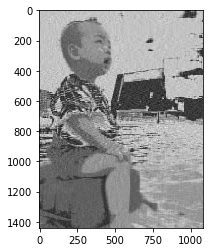

[[-12.24779657   4.78844171  -3.11651328 ... -25.979769   -27.28244065
   -6.74160196]
 [-13.0924797    4.29340253  -3.87849834 ... -28.24207082 -29.40134634
   -9.68644841]
 [-13.09109043   4.29473886  -3.87731201 ... -28.24136586 -29.40058708
   -9.68553716]
 ...
 [ -2.45341716  -5.66842655   6.09208651 ... -26.03940043  54.17260065
   49.4740296 ]
 [ -7.79582189 -11.38077873  -2.09510919 ... -18.34250633 -21.52591583
  -28.50968607]
 [ -7.36244094  -8.56779513  -2.32145712 ... -47.18100207 -49.60721631
  -57.01625466]]


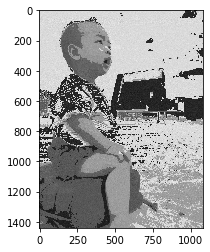

[[ -3.70100988  -1.61800534   6.16391069 ...   7.05013227 -15.16613991
   -2.61830654]
 [  2.76457449   3.94806258  -1.41389198 ...   1.35573451 -11.32461526
    4.9674894 ]
 [  2.77279881   3.95319368  -1.42188714 ...   1.35643767 -11.32345791
    4.96872916]
 ...
 [  0.72714371   1.8791767    7.1420969  ... -22.47380736  11.18176801
    0.49597548]
 [  2.49694884  -7.00287804   2.6374906  ...  13.08210415  -8.04372791
    3.20359776]
 [  0.91769973  -2.88107509  -2.26594725 ...  -8.94156871 -11.85164886
    1.45904583]]


In [6]:
import numpy as np
from scipy.linalg import svd
from PIL import Image
import matplotlib.pyplot as plt

# 取前k个特征，对图像进行还原
def get_image_feature(s, k):
	# 对于S，只保留前K个特征值
	s_temp = np.zeros(s.shape[0])
	s_temp[0:k] = s[0:k]
	s = s_temp * np.identity(s.shape[0])
	# 用新的s_temp，以及p,q重构A
	temp = np.dot(p,s)
	temp = np.dot(temp,q)
	plt.imshow(temp, cmap=plt.cm.gray, interpolation='nearest')
	plt.show()
	print(A-temp)


# 加载256色图片
image = Image.open('/content/gdrive/My Drive/les3/image_svd/256.bmp') 
A = np.array(image)
# 显示原图像
plt.imshow(A, cmap=plt.cm.gray, interpolation='nearest')
plt.show()
# 对图像矩阵A进行奇异值分解，得到p,s,q
p,s,q = svd(A, full_matrices=False)
# 取前k个特征，对图像进行还原
get_image_feature(s, 5)
get_image_feature(s, 50)
get_image_feature(s, 500)

In [8]:
# -*- coding: utf-8 -*-
# 信用卡违约率分析
import pandas as pd
from sklearn.model_selection import learning_curve, train_test_split,GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from matplotlib import pyplot as plt
import seaborn as sns

findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 20449 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 29992 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 21345 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 36829 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 32422 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_a

(30000, 25)
                 ID       LIMIT_BAL  ...       PAY_AMT6  default.payment.next.month
count  30000.000000    30000.000000  ...   30000.000000                30000.000000
mean   15000.500000   167484.322667  ...    5215.502567                    0.221200
std     8660.398374   129747.661567  ...   17777.465775                    0.415062
min        1.000000    10000.000000  ...       0.000000                    0.000000
25%     7500.750000    50000.000000  ...     117.750000                    0.000000
50%    15000.500000   140000.000000  ...    1500.000000                    0.000000
75%    22500.250000   240000.000000  ...    4000.000000                    0.000000
max    30000.000000  1000000.000000  ...  528666.000000                    1.000000

[8 rows x 25 columns]
0    23364
1     6636
Name: default.payment.next.month, dtype: int64


/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 20449 missing from current font.
  font.set_text(s, 0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 29992 missing from current font.
  font.set_text(s, 0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 21345 missing from current font.
  font.set_text(s, 0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 36829 missing from current font.
  font.set_text(s, 0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 32422 missing from current font.
  font.set_text(s, 0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 29575 missing from current font.
  font.set_text(s, 0,

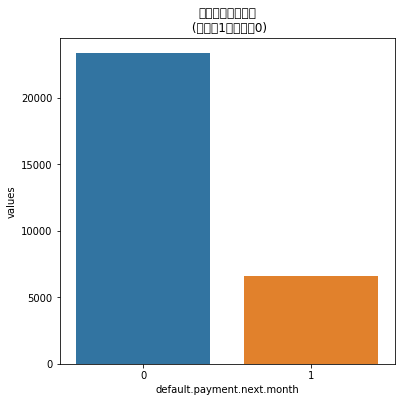

GridSearch最优参数： {'svc__C': 1, 'svc__gamma': 0.01}
GridSearch最优分数： 0.8186
准确率 0.8172
GridSearch最优参数： {'decisiontreeclassifier__max_depth': 6}
GridSearch最优分数： 0.8208
准确率 0.8113
GridSearch最优参数： {'randomforestclassifier__n_estimators': 6}
GridSearch最优分数： 0.8004
准确率 0.7994
GridSearch最优参数： {'kneighborsclassifier__n_neighbors': 8}
GridSearch最优分数： 0.8040
准确率 0.8036


In [9]:
# 数据加载
data = data = pd.read_csv('/content/gdrive/My Drive/les3/credit_default/UCI_Credit_Card.csv')
# 数据探索
print(data.shape) # 查看数据集大小
print(data.describe()) # 数据集概览
# 查看下一个月违约率的情况
next_month = data['default.payment.next.month'].value_counts()
print(next_month)
df = pd.DataFrame({'default.payment.next.month': next_month.index,'values': next_month.values})
plt.rcParams['font.sans-serif']=['SimHei'] #用来正常显示中文标签
plt.figure(figsize = (6,6))
plt.title('信用卡违约率客户\n (违约：1，守约：0)')
sns.set_color_codes("pastel")
sns.barplot(x = 'default.payment.next.month', y="values", data=df)
plt.show()
# 特征选择，去掉ID字段、最后一个结果字段即可
data.drop(['ID'], inplace=True, axis =1) #ID这个字段没有用
target = data['default.payment.next.month'].values
columns = data.columns.tolist()
columns.remove('default.payment.next.month')
features = data[columns].values
# 30%作为测试集，其余作为训练集
train_x, test_x, train_y, test_y = train_test_split(features, target, test_size=0.30, stratify = target, random_state = 1)
    
# 构造各种分类器
classifiers = [
    SVC(random_state = 1, kernel = 'rbf'),    
    DecisionTreeClassifier(random_state = 1, criterion = 'gini'),
    RandomForestClassifier(random_state = 1, criterion = 'gini'),
    KNeighborsClassifier(metric = 'minkowski'),
]
# 分类器名称
classifier_names = [
            'svc', 
            'decisiontreeclassifier',
            'randomforestclassifier',
            'kneighborsclassifier',
]
# 分类器参数
classifier_param_grid = [
            {'svc__C':[1], 'svc__gamma':[0.01]},
            {'decisiontreeclassifier__max_depth':[6,9,11]},
            {'randomforestclassifier__n_estimators':[3,5,6]} ,
            {'kneighborsclassifier__n_neighbors':[4,6,8]},
]
 
# 对具体的分类器进行GridSearchCV参数调优
def GridSearchCV_work(pipeline, train_x, train_y, test_x, test_y, param_grid, score = 'accuracy'):
    response = {}
    gridsearch = GridSearchCV(estimator = pipeline, param_grid = param_grid, scoring = score)
    # 寻找最优的参数 和最优的准确率分数
    search = gridsearch.fit(train_x, train_y)
    print("GridSearch最优参数：", search.best_params_)
    print("GridSearch最优分数： %0.4lf" %search.best_score_)
    predict_y = gridsearch.predict(test_x)
    print("准确率 %0.4lf" %accuracy_score(test_y, predict_y))
    response['predict_y'] = predict_y
    response['accuracy_score'] = accuracy_score(test_y,predict_y)
    return response
 
for model, model_name, model_param_grid in zip(classifiers, classifier_names, classifier_param_grid):
    pipeline = Pipeline([
            ('scaler', StandardScaler()),
            (model_name, model)
    ])
    result = GridSearchCV_work(pipeline, train_x, train_y, test_x, test_y, model_param_grid , score = 'accuracy')

In [13]:
!pip install deepctr

In [15]:
import pandas as pd
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from deepctr.models import DeepFM
#from deepctr.inputs import SparseFeat,get_feature_names
from deepctr.feature_column import SparseFeat,get_feature_names

In [16]:
#数据加载
data = pd.read_csv("/content/gdrive/My Drive/les3/movielens/movielens_sample.txt")
sparse_features = ["movie_id", "user_id", "gender", "age", "occupation", "zip"]
target = ['rating']

In [17]:
# 对特征标签进行编码
for feature in sparse_features:
    lbe = LabelEncoder()
    data[feature] = lbe.fit_transform(data[feature])
# 计算每个特征中的 不同特征值的个数
fixlen_feature_columns = [SparseFeat(feature, data[feature].nunique()) for feature in sparse_features]
linear_feature_columns = fixlen_feature_columns
dnn_feature_columns = fixlen_feature_columns
feature_names = get_feature_names(linear_feature_columns + dnn_feature_columns)

In [18]:
# 将数据集切分成训练集和测试集
train, test = train_test_split(data, test_size=0.2)
train_model_input = {name:train[name].values for name in feature_names}
test_model_input = {name:test[name].values for name in feature_names}

# 使用DeepFM进行训练
model = DeepFM(linear_feature_columns, dnn_feature_columns, task='regression')
model.compile("adam", "mse", metrics=['mse'], )
history = model.fit(train_model_input, train[target].values, batch_size=256, epochs=1, verbose=True, validation_split=0.2, )
# 使用DeepFM进行预测
pred_ans = model.predict(test_model_input, batch_size=256)
# 输出RMSE或MSE
mse = round(mean_squared_error(test[target].values, pred_ans), 4)
rmse = mse ** 0.5
print("test RMSE", rmse)

1/1 [==============================] - 3s 3s/step - loss: 13.8749 - mse: 13.8749 - val_loss: 14.2292 - val_mse: 14.2292
test RMSE 3.834670781175354
